## Imports

In [ ]:
# Imports
import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec
import pathlib
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow import keras
from tensorflow.keras import layers
import PIL
import matplotlib.pyplot as plt

## Prepare training and validation set 

In [ ]:

training_dir = pathlib.Path('/datasets/animali/animals_dataset_the_ostriches/animals_dataset/training')
validation_dir = pathlib.Path('/datasets/animali/animals_dataset_the_ostriches/animals_dataset/validation/query/')


image_count = len(list(training_dir.glob('*/*.jpg'))) # check if there are other extensions
print(image_count)

image_count = len(list(validation_dir.glob('*/*.JPEG')))
print(image_count)



16607
100


In [ ]:
img_height = 128
img_width = 128
img_depth = 1 # 1 if greyscale 3 if rgb

train_ds = tf.keras.utils.image_dataset_from_directory(
    training_dir,
    seed=420,
    image_size=(img_height, img_width),
    batch_size=16,

    #color_mode='grayscale',
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    validation_dir,
    seed=420,
    image_size=(img_height, img_width),
    batch_size=16,
    #color_mode='grayscale',

)



Found 16607 files belonging to 10 classes.
Found 100 files belonging to 10 classes.


In [ ]:
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label


AUTOTUNE = tf.data.experimental.AUTOTUNE

ds_train = train_ds.map(convert_to_float).cache().prefetch(buffer_size=AUTOTUNE)
ds_valid = val_ds.map(convert_to_float).cache().prefetch(buffer_size=AUTOTUNE)


## Define model

In [ ]:


IMG_SHAPE = (img_height, img_width, 3 ) 
base_model = tf.keras.applications.VGG16(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')


# questp è la rete neurale con i vari livelli
model = keras.Sequential([
    layers.Rescaling(1./255, input_shape=IMG_SHAPE),# this is for normalizing rgb values 

    layers.Conv2D(filters=16, kernel_size = 3, padding='same', activation='relu'),
    layers.MaxPooling2D(strides=(2, 2)),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(strides=(2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10)
    

])

model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        9280      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 65536)             0

## train

In [ ]:
model.compile(
    
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

history = model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=30,
)

Epoch 1/10
1038/1038 [==============================] - 2329s 2s/step - loss: 1.8610 - accuracy: 0.3539 - val_loss: 1.5231 - val_accuracy: 0.4800
Epoch 2/10
1038/1038 [==============================] - 371s 358ms/step - loss: 1.4510 - accuracy: 0.4956 - val_loss: 1.1812 - val_accuracy: 0.6000
Epoch 3/10
1038/1038 [==============================] - 369s 356ms/step - loss: 1.0550 - accuracy: 0.6388 - val_loss: 0.9993 - val_accuracy: 0.7200
Epoch 4/10
1038/1038 [==============================] - 364s 350ms/step - loss: 0.6871 - accuracy: 0.7735 - val_loss: 1.0787 - val_accuracy: 0.7600
Epoch 5/10
1038/1038 [==============================] - 335s 323ms/step - loss: 0.4604 - accuracy: 0.8540 - val_loss: 1.0961 - val_accuracy: 0.7600
Epoch 6/10
1038/1038 [==============================] - 335s 323ms/step - loss: 0.3144 - accuracy: 0.8997 - val_loss: 1.3721 - val_accuracy: 0.7900
Epoch 7/10
1038/1038 [==============================] - 335s 323ms/step - loss: 0.2105 - accuracy: 0.9338 - val_lo

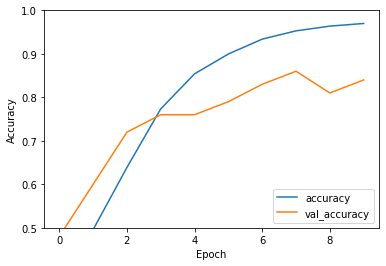

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')




<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=93aceac2-8452-469e-8b02-c16d0438aa9c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>